In [39]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

In [40]:
df = pd.read_csv("../data/processed/charging_sessions_cleaned.csv")

print(df.head())

   Unnamed: 0                        id             connectionTime  \
0           0  5e23b149f9af8b5fe4b973cf  2020-01-02 13:08:54+00:00   
1           1  5e23b149f9af8b5fe4b973d0  2020-01-02 13:36:50+00:00   
2           2  5e23b149f9af8b5fe4b973d1  2020-01-02 13:56:35+00:00   
3           3  5e23b149f9af8b5fe4b973d2  2020-01-02 13:59:58+00:00   
4           4  5e23b149f9af8b5fe4b973d3  2020-01-02 14:00:01+00:00   

              disconnectTime           doneChargingTime  kWhDelivered  \
0  2020-01-02 19:11:15+00:00  2020-01-02 17:31:35+00:00        25.016   
1  2020-01-02 22:38:21+00:00  2020-01-02 20:18:05+00:00        33.097   
2  2020-01-03 00:39:22+00:00  2020-01-02 16:35:06+00:00         6.521   
3  2020-01-02 16:38:39+00:00  2020-01-02 15:18:45+00:00         2.355   
4  2020-01-02 22:08:40+00:00  2020-01-02 18:17:30+00:00        13.375   

                                sessionID  siteID    stationID  \
0  1_1_179_810_2020-01-02 13:08:53.870034       1  1-1-179-810   
1  1_1_1

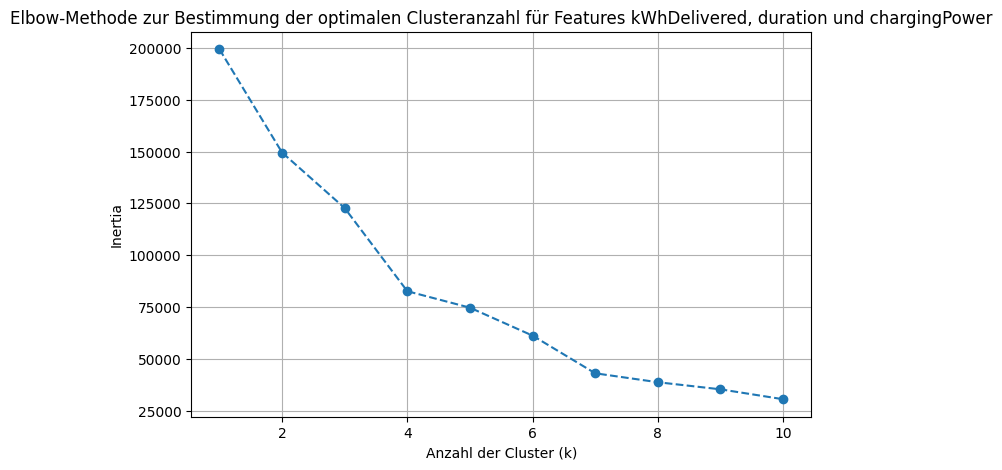

In [41]:
# Auswahl der relevanten Merkmale
features = df[['kWhDelivered', 'duration', 'chargingPower']].copy()

# Normalisierung der Daten
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Bestimmung der optimalen Anzahl an Clustern mit der Elbow-Methode
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_features)
    inertia.append(kmeans.inertia_)

# Elbow-Plot erstellen
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title('Elbow-Methode zur Bestimmung der optimalen Clusteranzahl für Features kWhDelivered, duration und chargingPower')
plt.xlabel('Anzahl der Cluster (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

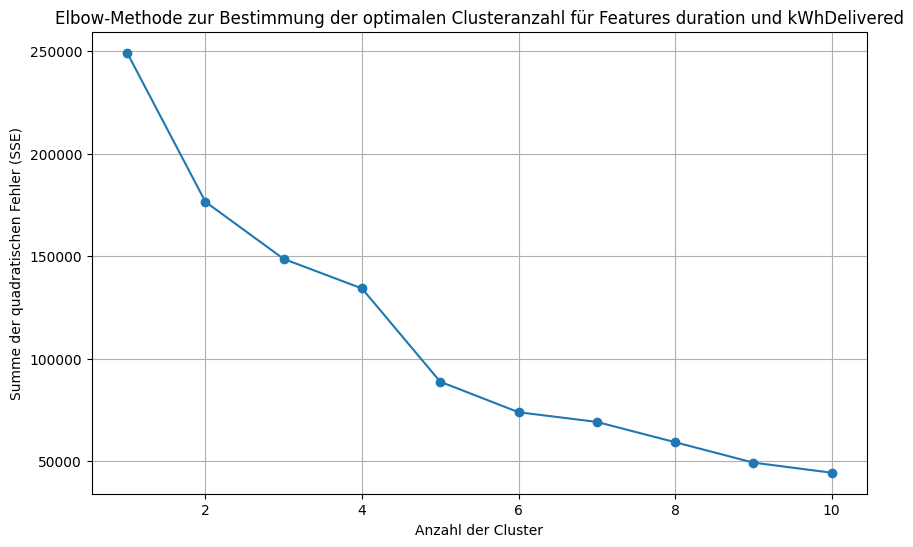

In [42]:
#Filter Values
df_cleaned = df[(df['duration'] <= 100) & (df['kWhDelivered'] <= 100) & (df['durationUntilFullCharge'] > 0) & (df['chargingPower'] > 0)]
#Select columns for clustering
data = df_cleaned[['duration', 'kWhDelivered','durationUntilFullCharge','chargingPower']]

#Scale data for clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Bestimmung der optimalen Anzahl an Clustern mit der Elbow-Methode
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

#Plot SSE for each k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow-Methode zur Bestimmung der optimalen Clusteranzahl für Features duration und kWhDelivered')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('Summe der quadratischen Fehler (SSE)')
plt.grid(True)
plt.show()

C:\Users\tobia\AppData\Local\Temp\ipykernel_31724\3180702765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cluster'] = kmeans.fit_predict(data_scaled)


Cluster-Zentren (4 Cluster):
Cluster 1: Ladezeit = 11.00 Stunden, Energie = 12.30 kWh
Cluster 2: Ladezeit = 8.30 Stunden, Energie = 10.27 kWh
Cluster 3: Ladezeit = 8.71 Stunden, Energie = 35.37 kWh
Cluster 4: Ladezeit = 2.59 Stunden, Energie = 6.39 kWh


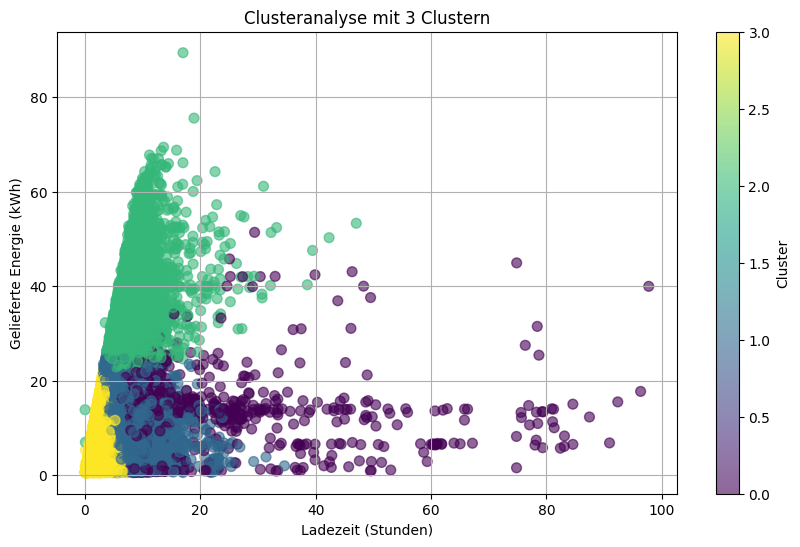

In [43]:
# Apply KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df_cleaned['cluster'] = kmeans.fit_predict(data_scaled)

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

print("Cluster-Zentren (4 Cluster):")
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i+1}: Ladezeit = {center[0]:.2f} Stunden, Energie = {center[1]:.2f} kWh")


#Plot the cluster
plt.figure(figsize=(10, 6))
plt.scatter(data['duration'], data['kWhDelivered'], c=df_cleaned['cluster'], cmap='viridis', s=50, alpha=0.6)
plt.xlabel("Ladezeit (Stunden)")
plt.ylabel("Gelieferte Energie (kWh)")
plt.title("Clusteranalyse mit 3 Clustern")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

C:\Users\tobia\AppData\Local\Temp\ipykernel_31724\3570190042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cluster'] = kmeans.fit_predict(data_scaled)


Cluster-Zentren (4 Cluster):
Cluster 1: Ladezeit = 11.00 Stunden, Energie = 12.30 kWh
Cluster 2: Ladezeit = 8.30 Stunden, Energie = 10.27 kWh
Cluster 3: Ladezeit = 8.71 Stunden, Energie = 35.37 kWh
Cluster 4: Ladezeit = 2.59 Stunden, Energie = 6.39 kWh


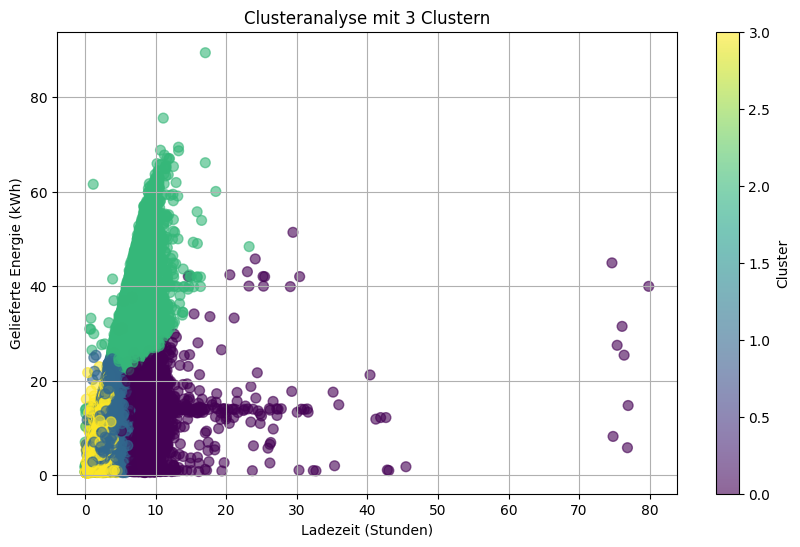

In [44]:
# Apply KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df_cleaned['cluster'] = kmeans.fit_predict(data_scaled)

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

print("Cluster-Zentren (4 Cluster):")
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i+1}: Ladezeit = {center[0]:.2f} Stunden, Energie = {center[1]:.2f} kWh")


#Plot the cluster
plt.figure(figsize=(10, 6))
plt.scatter(data['durationUntilFullCharge'], data['kWhDelivered'], c=df_cleaned['cluster'], cmap='viridis', s=50, alpha=0.6)
plt.xlabel("Ladezeit (Stunden)")
plt.ylabel("Gelieferte Energie (kWh)")
plt.title("Clusteranalyse mit 3 Clustern")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

connectionTime      0
disconnectTime      0
doneChargingTime    0
dtype: int64
   connection_sin  connection_cos
0       -0.292372       -0.956305
1       -0.406737       -0.913545
2       -0.484810       -0.874620
3       -0.496217       -0.868199
4       -0.500000       -0.866025
Cluster-Zentren (4 Cluster):
Cluster 1: Verbindung (Sinus) = -0.67, Verbindung (Kosinus) = -0.65, Trennung (Sinus) = -0.01, Trennung (Kosinus) = 0.92, Ladezeit (Sinus) = -0.87, Ladezeit (Kosinus) = 0.18
Cluster 2: Verbindung (Sinus) = -0.69, Verbindung (Kosinus) = 0.28, Trennung (Sinus) = 0.16, Trennung (Kosinus) = 0.90, Ladezeit (Sinus) = -0.13, Ladezeit (Kosinus) = 0.91
Cluster 3: Verbindung (Sinus) = -0.64, Verbindung (Kosinus) = -0.55, Trennung (Sinus) = -0.87, Trennung (Kosinus) = 0.17, Ladezeit (Sinus) = -0.88, Ladezeit (Kosinus) = -0.07
Cluster 4: Verbindung (Sinus) = 0.45, Verbindung (Kosinus) = 0.73, Trennung (Sinus) = 0.59, Trennung (Kosinus) = 0.22, Ladezeit (Sinus) = 0.74, Ladezeit (Kosinus) = 0.

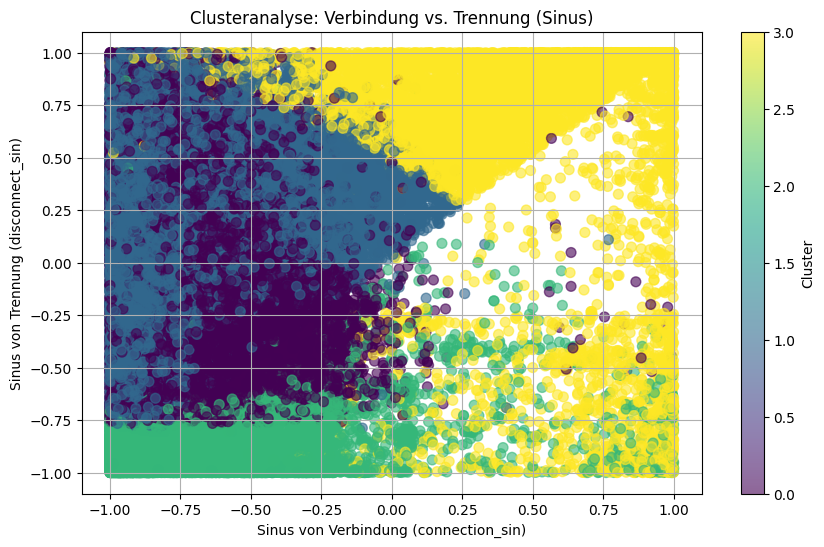

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df2 = df_cleaned[['connectionTime', 'disconnectTime', 'doneChargingTime']].copy()

# Konvertierung der Zeitstempel in datetime-Objekte mit Fehlerbehandlung
df2['connectionTime'] = pd.to_datetime(df2['connectionTime'], errors='coerce')
df2['disconnectTime'] = pd.to_datetime(df2['disconnectTime'], errors='coerce')
df2['doneChargingTime'] = pd.to_datetime(df2['doneChargingTime'], errors='coerce')

# Überprüfen, ob es ungültige Zeitstempel gibt
print(df2.isnull().sum())

# Stunden extrahieren
df2['connection_hour'] = df2['connectionTime'].dt.hour + df2['connectionTime'].dt.minute / 60
df2['disconnect_hour'] = df2['disconnectTime'].dt.hour + df2['disconnectTime'].dt.minute / 60
df2['doneCharging_hour'] = df2['doneChargingTime'].dt.hour + df2['doneChargingTime'].dt.minute / 60

# Sinus- und Kosinus-Transformation für zyklische Daten
df2['connection_sin'] = np.sin(2 * np.pi * df2['connection_hour'] / 24)
df2['connection_cos'] = np.cos(2 * np.pi * df2['connection_hour'] / 24)

df2['disconnect_sin'] = np.sin(2 * np.pi * df2['disconnect_hour'] / 24)
df2['disconnect_cos'] = np.cos(2 * np.pi * df2['disconnect_hour'] / 24)

df2['doneCharging_sin'] = np.sin(2 * np.pi * df2['doneCharging_hour'] / 24)
df2['doneCharging_cos'] = np.cos(2 * np.pi * df2['doneCharging_hour'] / 24)

# Ergebnis anzeigen
print(df2[['connection_sin', 'connection_cos']].head())


# Erstelle den DataFrame mit den Sinus- und Kosinus-Werten
df_cluster = df2[['connection_sin', 'connection_cos', 'disconnect_sin', 'disconnect_cos', 'doneCharging_sin', 'doneCharging_cos']].copy()

# Skaliere die Daten
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_cluster)

# KMeans-Clusteranalyse mit 4 Clustern
kmeans = KMeans(n_clusters=4, random_state=42)
df2['cluster'] = kmeans.fit_predict(data_scaled)

# Clusterzentren zurückskalieren
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Cluster-Zentren anzeigen
print("Cluster-Zentren (4 Cluster):")
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i+1}: Verbindung (Sinus) = {center[0]:.2f}, Verbindung (Kosinus) = {center[1]:.2f}, "
          f"Trennung (Sinus) = {center[2]:.2f}, Trennung (Kosinus) = {center[3]:.2f}, "
          f"Ladezeit (Sinus) = {center[4]:.2f}, Ladezeit (Kosinus) = {center[5]:.2f}")

# Visualisierung: Verbindung vs. Trennung in Sinus- und Kosinus-Werten
plt.figure(figsize=(10, 6))
plt.scatter(df2['connection_sin'], df2['disconnect_sin'], c=df2['cluster'], cmap='viridis', s=50, alpha=0.6)
plt.xlabel("Sinus von Verbindung (connection_sin)")
plt.ylabel("Sinus von Trennung (disconnect_sin)")
plt.title("Clusteranalyse: Verbindung vs. Trennung (Sinus)")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()